In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Cleaning and analysing Swiggy Data, Data  is provided open source at kaggle

In [2]:
df = pd.read_csv('Swiggy_dataset.csv')
df.head()

,type,id,name,uuid,city,area,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,address,locality,unserviceable,veg,City
0,F,37933,Faasos - Wraps & Rolls,6fe9caf1-02a7-4e66-83bb-1b4ff296b683,Ahmedabad,Vastrapur,4.2,500+ ratings,['Combo' 'Snacks' 'Beverages' 'Desserts' 'Indi...,₹200 FOR TWO,44,44,44,SHOP NO 2 HOTEL SHAHI PALACE VASTRAPUR LAKE AH...,HOTEL SHAHI PALACE,False,False,NaN
1,F,81814,Burger King,10083576-d32d-4a0e-8a82-3236ef342a19,Ahmedabad,Ellisbridge,4.2,1000+ ratings,['American' 'Fast Food'],₹350 FOR TWO,33,33,33,SHOP # 5 GR FLR THIRD EYE 2PANCHAVATI CIRCLE O...,3rd Eye II Ellis Bridge CG Road,False,False,NaN
2,F,107046,Mahalaxmi Pav Bhaji,fbfe3bfa-03fd-4708-b913-06e2c9ee9639,Ahmedabad,Ellisbridge,4.3,500+ ratings,['North Indian'],₹200 FOR TWO,28,28,28,GF 9/10 Dev complexnear parimal charasta opp. ...,C G Road,False,True,NaN
3,F,328315,HIIT Meals,81ab4019-2445-4aef-aff2-04beccd641d9,Ahmedabad,Vishala,--,Too Few Ratings,['Fast Food' 'Combo' 'Snacks' 'North Indian' '...,₹150 FOR TWO,51,51,51,C11 Rajyash Rise Near Vishala Restaurant Vasna...,Vasna,False,False,NaN
4,F,108879,Jay Jalaram Parotha House,994e73e1-7c7c-4ad9-87e7-ecfecd4e36fa,Ahmedabad,Ellisbridge,3.9,100+ ratings,['North Indian'],₹250 FOR TWO,29,29,29,Capital Commercial Centre Near UCO Bank Ashram...,Ashram Road,False,True,NaN


#1 Cleaning data, Removing Nan Values, Unwanted Colums

In [3]:
df.isnull().sum()

type                     0
id                       0
name                     0
uuid                     3
city                     0
area                     0
avgRating                0
totalRatingsString       0
cuisines                 0
costForTwoStrings        0
deliveryTime             0
minDeliveryTime          0
maxDeliveryTime          0
address                  9
locality                10
unserviceable            6
veg                      6
City                  8691
dtype: int64

In [4]:
df_cleaned = df.dropna(subset=['veg'], inplace=True)

print(df_cleaned)

None


In [5]:
df_cleaned = df.dropna(subset=['uuid'], inplace=True)

print(df_cleaned)

None


In [6]:
df_cleaned = df.dropna(subset=['address'], inplace=True)

print(df_cleaned)

None


In [7]:
df_cleaned = df.dropna(subset=['locality'], inplace=True)

print(df_cleaned)

None


In [8]:
df_cleaned = df.dropna(subset=['unserviceable'], inplace=True)

print(df_cleaned)



None


---------------------------------------------------------------

Data is cleaned very much, Now we don't have any Nan values, let's remove unwanted colums from data set

In [9]:
df.drop('City', axis=1, inplace=True)

In [10]:
df.drop('uuid', axis=1, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8668 entries, 0 to 8690
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   type                8668 non-null   object
 1   id                  8668 non-null   int64 
 2   name                8668 non-null   object
 3   city                8668 non-null   object
 4   area                8668 non-null   object
 5   avgRating           8668 non-null   object
 6   totalRatingsString  8668 non-null   object
 7   cuisines            8668 non-null   object
 8   costForTwoStrings   8668 non-null   object
 9   deliveryTime        8668 non-null   int64 
 10  minDeliveryTime     8668 non-null   int64 
 11  maxDeliveryTime     8668 non-null   int64 
 12  address             8668 non-null   object
 13  locality            8668 non-null   object
 14  unserviceable       8668 non-null   object
 15  veg                 8668 non-null   object
dtypes: int64(4), object(12)
memor

#converting data type of delivery time to numeric.

In [12]:
df['deliveryTime'] = pd.to_numeric(df['deliveryTime'], errors='coerce')

In [13]:
result = df.groupby('city').agg({'deliveryTime': 'mean'})
print(result)

           deliveryTime
city                   
Ahmedabad     44.615385
Bangalore     50.518008
Chennai       58.967421
Delhi         50.767974
Hyderabad     49.932961
Kolkata       67.813850
Mumbai        48.323137
Pune          55.832721
Surat         48.484375


----------------------------------------------------

#2 Now let's start anaylsing and arrangeing data

There was "--" value in rating which may cause problem during calculation so relaced it with 0

In [14]:
df['avgRating'] = df['avgRating'].str.replace('--', '0')


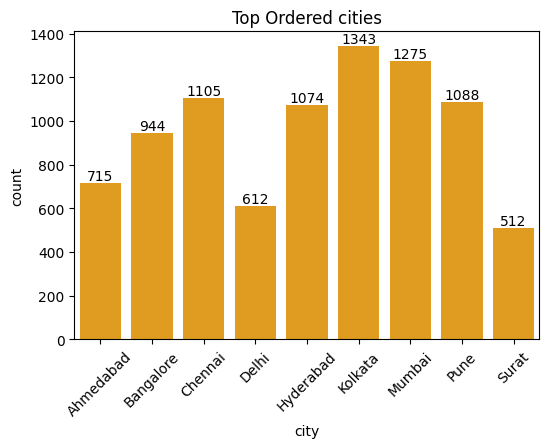

In [15]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
ax= sns.countplot(data= df, x='city', color='orange')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top Ordered cities')
plt.show()

From the graph we can see that Kolkata is top ordered city.

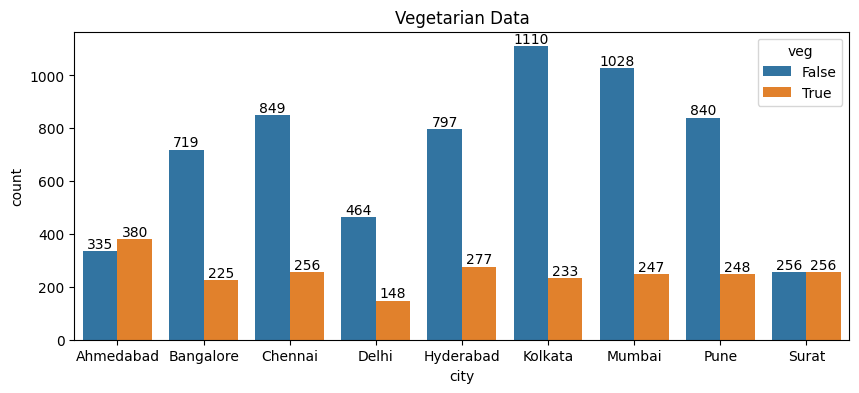

In [16]:
plt.figure(figsize=(10,4))
ax= sns.countplot(data=df, x='city', hue='veg')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Vegetarian Data')
plt.show()

From the above chart we can see there are more non-veg orders compare to veg

In [17]:
def check_delivery_status(row):
    if row['deliveryTime'] >= row['minDeliveryTime'] and row['deliveryTime'] <= row['maxDeliveryTime']:
        return 'On Time'
    else:
        return 'Delayed'

In [18]:
df['deliveryStatus'] = df.apply(check_delivery_status, axis=1)


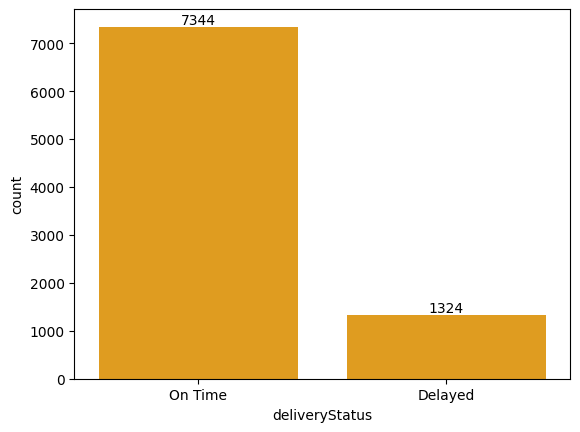

In [19]:
ax= sns.countplot(data=df, x='deliveryStatus', color='orange')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='city', ylabel='count'>

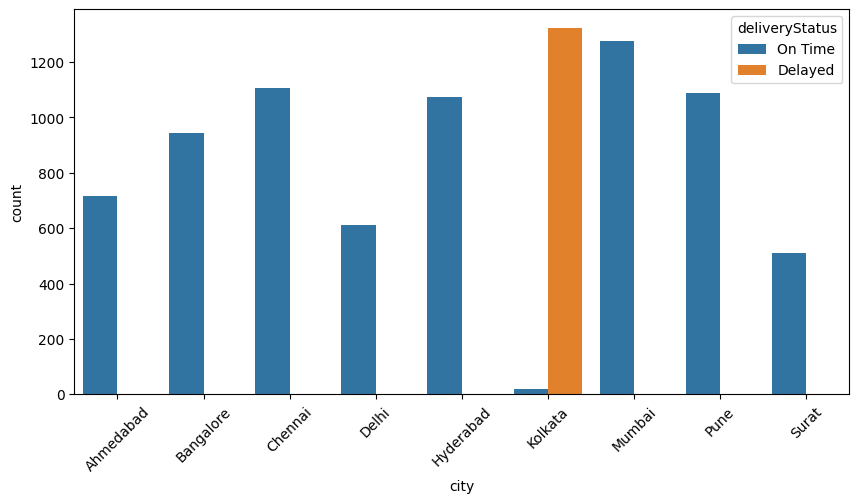

In [20]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.countplot(data=df, x='city', hue='deliveryStatus')


From the above chart we can clearly see that Kolkata has most delayed deliveres compare to other cities

<Axes: xlabel='avgRating', ylabel='count'>

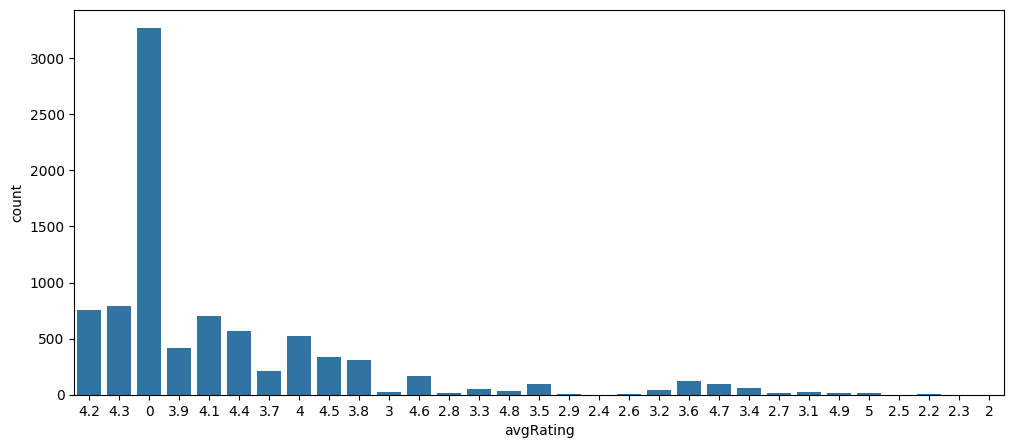

In [21]:

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='avgRating')


As we can see from the above charts, we can see there are lot's of resturant with 0 rating, so we can't analysis more with it.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8668 entries, 0 to 8690
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   type                8668 non-null   object
 1   id                  8668 non-null   int64 
 2   name                8668 non-null   object
 3   city                8668 non-null   object
 4   area                8668 non-null   object
 5   avgRating           8668 non-null   object
 6   totalRatingsString  8668 non-null   object
 7   cuisines            8668 non-null   object
 8   costForTwoStrings   8668 non-null   object
 9   deliveryTime        8668 non-null   int64 
 10  minDeliveryTime     8668 non-null   int64 
 11  maxDeliveryTime     8668 non-null   int64 
 12  address             8668 non-null   object
 13  locality            8668 non-null   object
 14  unserviceable       8668 non-null   object
 15  veg                 8668 non-null   object
 16  deliveryStatus      8668 non-

In [23]:
df['costForTwoStrings'].head()

0    ₹200 FOR TWO
1    ₹350 FOR TWO
2    ₹200 FOR TWO
3    ₹150 FOR TWO
4    ₹250 FOR TWO
Name: costForTwoStrings, dtype: object

In [24]:
from collections import defaultdict

In [25]:
def extract_cuisine(df: pd.DataFrame, column_name: str) -> pd.DataFrame: 
    ''' A function to extract all cuisines mentioned for every restaurant and 
    add it to a dictionairy which would increment at each occurance '''
    # Initialize a default dict, when a key is initialized value set to 0
    cuisine_count = defaultdict(int) 
    for cuisines in df[column_name]: # Iterate through each cuisine for restaurant
        if pd.notna(cuisines):
            # Create a list containing cuisines mentioned for singular restaurant
            cuisines_list = [x.strip() for x in cuisines.split(',')]
            for cuisine in cuisines_list: # Iterate through each cuisine in list 
                # Incremenet count on each occurance of cuisine on list
                cuisine_count[cuisine] += 1 
    cuisine_df = pd.DataFrame(list(cuisine_count.items()), columns=['cuisine', 'count'])
    return cuisine_df

# Order by popularity
cuisine_popularity = extract_cuisine(df, 'cuisines').sort_values(
    by = 'count',
    ascending = False
)

In [26]:
top_10_cuisine = cuisine_popularity.head(10)
top_10_cuisine

,cuisine,count
9,['Indian'],389
63,['Chinese'],277
2,['North Indian'],246
41,['Fast Food'],240
15,['South Indian'],227
5,['Desserts'],106
6,['Indian' 'Chinese'],105
10,['North Indian' 'Chinese'],99
67,['Bakery'],90
28,['Beverages'],82


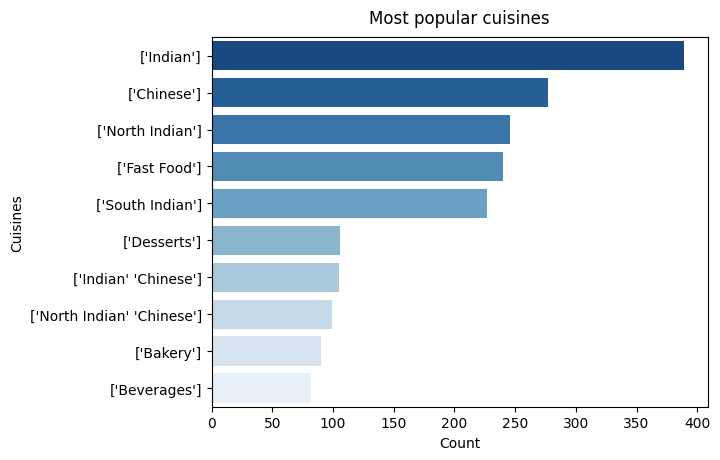

In [27]:
sns.barplot(
    data = top_10_cuisine,
    x = 'count', 
    y = 'cuisine', 
    hue = 'cuisine',
    orient = 'h',
    palette = 'Blues_r',
    dodge = False
)
plt.ylabel('Cuisines')
plt.xlabel('Count')
plt.title('Most popular cuisines', pad = 10)
plt.show()

----------------------------------

###Conclusion

--------------------------------------------------

1. Kolkata is the ordered city followed by Mumbai, Pune, and Hyderabad.
2. From chart 2 we can see that there are more 'Non-Veg' orders compared to veg.
3. We can see Delivery on Time is good.
4. Despite being the Top Order City 'Kolkata' which has major Delay deliveries, Mumbai and other cities have Good delivery times compared to Kolkata.
5. There are a lot of 'No Rated/Less Rated' restaurants.
6. Indian is the highest-selling cuisine followed by Chinese and  North India.

--------------------------------------------------